In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "C:/Users/joshi/Downloads/unnati_phase1_data_revised/unnati_phase1_data_revised.csv"
data = pd.read_csv(data_path)

In [3]:
print(data.head())

     Alert        Date      Time        Lat       Long  Vehicle  Speed
0  cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48
1  cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58
2  cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57
3  cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49
4  cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58


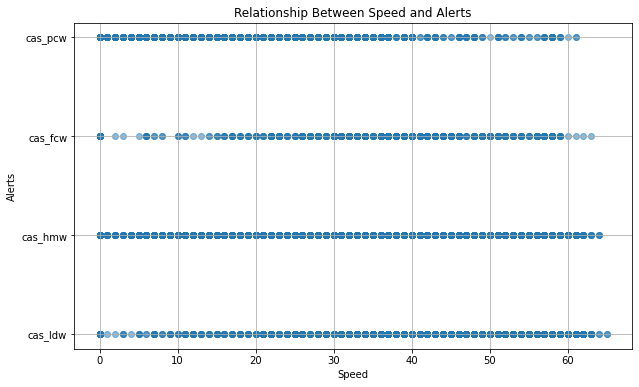

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset into a DataFrame named 'data'
# data.head() should look like the sample you provided

# Extract the 'Alert' and 'Speed' columns from the DataFrame
alerts = data['Alert']
speed = data['Speed']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(speed, alerts, alpha=0.5)
plt.title('Relationship Between Speed and Alerts')
plt.xlabel('Speed')
plt.ylabel('Alerts')
plt.grid(True)
plt.show()


In [5]:
print(data.describe())

print(data.isnull().sum())


                Lat          Long       Vehicle         Speed
count  21325.000000  21325.000000  21325.000000  21325.000000
mean      12.900458     80.118533   2910.684689     38.403845
std        0.147163      0.107352   1747.621338     16.847610
min       12.338685     79.774120    805.000000      0.000000
25%       12.850645     80.065984    805.000000     27.000000
50%       12.942436     80.129990   2846.000000     41.000000
75%       13.006814     80.205680   5339.000000     54.000000
max       13.182797     80.316079   5339.000000     65.000000
Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64


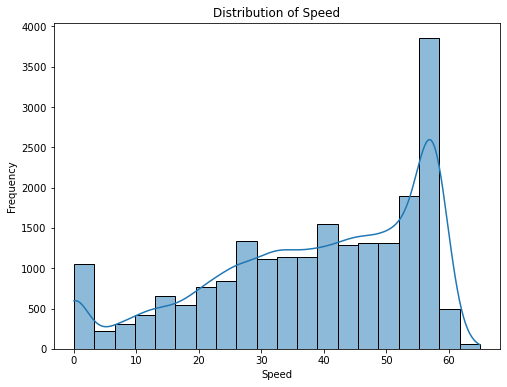

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Speed'], bins=20, kde=True)
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Speed')
plt.show()

In [7]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

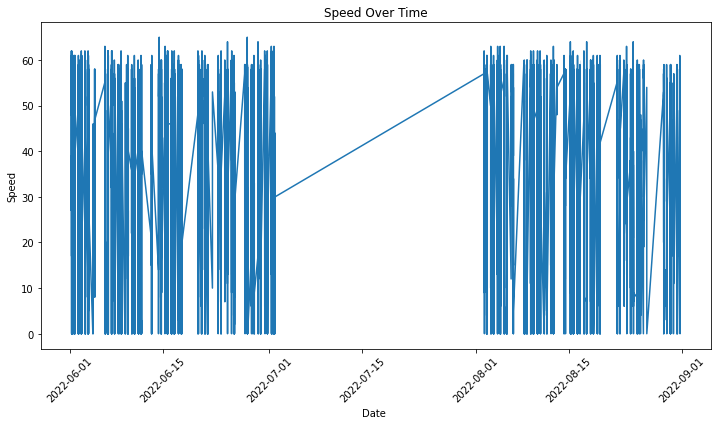

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='DateTime', y='Speed')
plt.xlabel('Date ')
plt.ylabel('Speed')
plt.title('Speed Over Time')
plt.xticks(rotation=45)
plt.show()

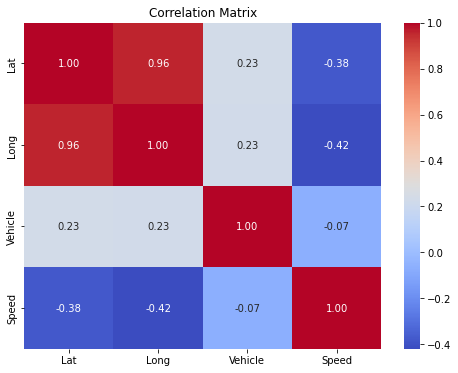

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
data['Time'] = pd.to_datetime(data['Time'])

In [11]:
filtered_data_morning = data[(data['Time'] >= '05:00:00') & (data['Time'] <= '12:00:00')]


In [12]:
alert_counts = filtered_data_morning['Alert'].value_counts()
alert_counts

cas_hmw    5653
cas_ldw    3650
cas_pcw     735
cas_fcw     263
Name: Alert, dtype: int64

In [13]:
data['Time'] = pd.to_datetime(data['Time'])
filtered_data_afternoon = data[(data['Time'] >= '12:00:00') & (data['Time'] <= '17:00:00')]


In [14]:
alert_counts = filtered_data_afternoon['Alert'].value_counts()
alert_counts

cas_hmw    2580
cas_ldw    1131
cas_pcw     177
cas_fcw     143
Name: Alert, dtype: int64

In [15]:
data['Time'] = pd.to_datetime(data['Time'])
filtered_data_night = data[(data['Time'] >= '17:00:00') & (data['Time'] <= '23:59:00')]


In [16]:
alert_counts = filtered_data_night['Alert'].value_counts()
alert_counts

cas_hmw    4101
cas_ldw    1651
cas_pcw    1064
cas_fcw     184
Name: Alert, dtype: int64

In [17]:
data['Time'] = pd.to_datetime(data['Time'])
filtered_data_night = data[(data['Time'] >= '07:00:00') & (data['Time'] <= '09:00:00')]


In [18]:
alert_counts = filtered_data_night['Alert'].value_counts()
alert_counts

cas_hmw    5045
cas_ldw    2360
cas_pcw     684
cas_fcw     238
Name: Alert, dtype: int64

In [19]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

In [20]:
hourly_alert_counts = data.groupby(['Hour', 'Alert']).size().unstack(fill_value=0)

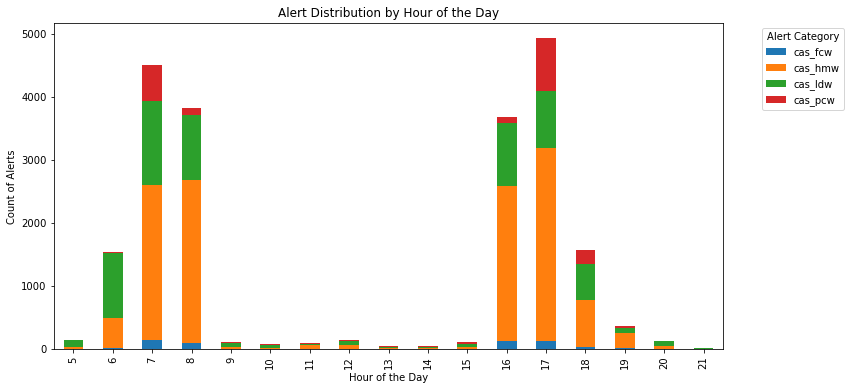

In [21]:
hourly_alert_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Alert Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Alerts')
plt.legend(title='Alert Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [22]:
!pip install folium
import folium
from folium.plugins import HeatMap

In [23]:
m = folium.Map(location=[12.887403, 80.083412], zoom_start=12)

In [24]:
import numpy as np

In [25]:
locations = data[['Lat', 'Long']].values

In [26]:
HeatMap(locations).add_to(m)
m.save('heatmap.html')
m

In [27]:
num_rows = 50  # Adjust as needed
num_cols = 50  # Adjust as needed

In [28]:
min_lat = data['Lat'].min()
max_lat = data['Lat'].max()
min_lon = data['Long'].min()
max_lon = data['Long'].max()

In [29]:
lat_step = (max_lat - min_lat) / num_rows
lon_step = (max_lon - min_lon) / num_cols

In [30]:
# Create an empty grid to store alert counts
grid = np.zeros((num_rows, num_cols), dtype=int)

In [31]:
# Iterate through the dataset and count alerts in each cell
for _, row in data.iterrows():
    lat_index = int((row['Lat'] - min_lat) / lat_step)
    lon_index = int((row['Long'] - min_lon) / lon_step)
    
    # Make sure the indices are within bounds
    lat_index = min(num_rows - 1, max(0, lat_index))
    lon_index = min(num_cols - 1, max(0, lon_index))
    
    grid[lat_index, lon_index] += 1


In [32]:
# Find the cell with the maximum alert count
max_alerts = grid.max()
max_alerts_index = np.unravel_index(np.argmax(grid), grid.shape)

In [33]:
# Calculate the latitude and longitude of the cell with maximum alerts
max_alerts_lat = min_lat + max_alerts_index[0] * lat_step
max_alerts_lon = min_lon + max_alerts_index[1] * lon_step

print(f"Area with maximum alerts: Latitude {max_alerts_lat}, Longitude {max_alerts_lon}")
print(f"Number of alerts in this area: {max_alerts}")

Area with maximum alerts: Latitude 12.929563400000001, Longitude 80.12097376
Number of alerts in this area: 803


In [34]:
latitude = max_alerts_lat
longitude = max_alerts_lon
m = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add a marker at the specified coordinates
folium.Marker([latitude, longitude], tooltip='Location').add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('location_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
m

In [35]:
import folium
import numpy as np

# Create a base map centered at the desired latitude and longitude
latitude_center = 12.887403
longitude_center = 80.083412
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Define the number of rows and columns in the grid
num_rows = 100  # Adjust as needed
num_cols = 100  # Adjust as needed

# Calculate the range of latitudes and longitudes
min_lat = data['Lat'].min()
max_lat = data['Lat'].max()
min_lon = data['Long'].min()
max_lon = data['Long'].max()

# Calculate the width and height of each grid cell
lat_step = (max_lat - min_lat) / num_rows
lon_step = (max_lon - min_lon) / num_cols

# Create circular polygons for each grid cell
for lat_index in range(num_rows):
    for lon_index in range(num_cols):
        # Calculate the coordinates of the grid cell's center
        lat_center = min_lat + lat_index * lat_step + lat_step / 2
        lon_center = min_lon + lon_index * lon_step + lon_step / 2
        
        # Calculate the radius for the grid cell
        radius = min(lat_step, lon_step) / 2
        
        # Create a circular polygon for the grid cell
        folium.Circle(
            location=[lat_center, lon_center],
            radius=radius,
            color='blue',  # Adjust the color as needed
            fill=True,
            fill_color='blue',  # Adjust the fill color as needed
            fill_opacity=0.2,  # Adjust the opacity as needed
        ).add_to(m)

# Add a marker at the specified coordinates (max_alerts_lat, max_alerts_lon)
latitude = max_alerts_lat
longitude = max_alerts_lon
folium.Marker([latitude, longitude], tooltip='Location').add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('combined_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
m


In [47]:
data['Date'] = pd.to_datetime(data['Date'])

# Filter the DataFrame to include only data for July
july_data = data[(data['Date'].dt.month == 7)]

# Display the first few rows of the July data
print(july_data.tail())

         Alert       Date                Time        Lat       Long  Vehicle  \
11196  cas_hmw 2022-07-01 2023-09-10 20:29:05  13.066866  80.254351     5339   
11197  cas_hmw 2022-07-01 2023-09-10 20:30:33  13.067575  80.249719     5339   
11198  cas_hmw 2022-07-01 2023-09-10 20:30:35  13.067575  80.249719     5339   
11199  cas_hmw 2022-07-01 2023-09-10 20:30:36  13.067575  80.249719     5339   
11200  cas_hmw 2022-07-01 2023-09-10 20:30:52  13.067724  80.248822     5339   

       Speed            DateTime  Hour  Month  
11196      8 2022-07-01 20:29:05    20      7  
11197     27 2022-07-01 20:30:33    20      7  
11198     27 2022-07-01 20:30:35    20      7  
11199     27 2022-07-01 20:30:36    20      7  
11200     30 2022-07-01 20:30:52    20      7  


In [37]:
# Step 1: Group the data by latitude and longitude and count occurrences
coordinates_counts = data.groupby(['Lat', 'Long']).size().reset_index(name='AccidentCount')

# Step 2: Filter coordinates with more than 20 accidents
coordinates_with_more_than_5_accidents = coordinates_counts[coordinates_counts['AccidentCount'] > 5]

# Step 3: Display the filtered coordinates
print(coordinates_with_more_than_5_accidents)

             Lat       Long  AccidentCount
3737   12.795946  80.020812              6
4931   12.864715  80.074529              6
5212   12.875621  80.082901             13
5216   12.875630  80.082909              7
7577   12.920214  80.111140              6
7943   12.923111  80.123753              6
8243   12.927230  80.118412             12
9327   12.945427  80.183226              6
9577   12.948956  80.138235              6
11492  12.979753  80.227250              7
11757  12.983254  80.127314              6
11830  12.984200  80.171294              6
12327  12.992198  80.182455             16
12703  12.997932  80.191531              6
14294  13.011249  80.218108              9
15049  13.025699  80.230298             10
15207  13.028477  80.235951              6
15232  13.029250  80.266478              6
15756  13.044476  80.266800              6
16534  13.057336  80.257715             10
16722  13.062136  80.263221              7
16820  13.063737  80.250966              8
16836  13.0

In [38]:
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Iterate through the filtered coordinates and add markers to the map
for _, row in coordinates_with_more_than_5_accidents.iterrows():
    latitude = row['Lat']
    longitude = row['Long']
    accident_count = row['AccidentCount']

    # Create a marker with a popup showing the accident count
    marker = folium.Marker(
        location=[latitude, longitude],
        tooltip=f'Accidents: {accident_count}',
    )
    marker.add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('accident_locations_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
m

In [39]:
# Step 1: Group the data by latitude and longitude and count occurrences
coordinates_counts = data.groupby(['Lat', 'Long']).size().reset_index(name='AccidentCount')

# Step 2: Filter coordinates with more than 20 accidents
coordinates_with_more_than_10_accidents = coordinates_counts[coordinates_counts['AccidentCount'] >= 10]

# Step 3: Display the filtered coordinates
print(coordinates_with_more_than_10_accidents)

             Lat       Long  AccidentCount
5212   12.875621  80.082901             13
8243   12.927230  80.118412             12
12327  12.992198  80.182455             16
15049  13.025699  80.230298             10
16534  13.057336  80.257715             10


In [48]:
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Iterate through the filtered coordinates and add markers to the map
for _, row in coordinates_with_more_than_10_accidents.iterrows():
    latitude = row['Lat']
    longitude = row['Long']
    accident_count = row['AccidentCount']

    # Create a marker with a popup showing the accident count
    marker = folium.Marker(
        location=[latitude, longitude],
        tooltip=f'Accidents: {accident_count}',
    )
    marker.add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('accident_locations_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
m

In [42]:
import folium
import pandas as pd

# Assuming you've already loaded and processed your data
# coordinates_with_more_than_20_accidents should be a DataFrame containing the filtered coordinates

# Create a base map centered at a location of your choice
latitude_center = 12.887403
longitude_center = 80.083412
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Iterate through the filtered coordinates and add markers to the map without labels
for _, row in coordinates_with_more_than_10_accidents.iterrows():
    latitude = row['Lat']
    longitude = row['Long']
    accident_count = row['AccidentCount']

    # Create a marker with a tooltip displaying the accident count
    marker = folium.Marker(
        location=[latitude, longitude],
        tooltip=f'Accidents: {accident_count}',
    )
    marker.add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save('all_accident_locations_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
m


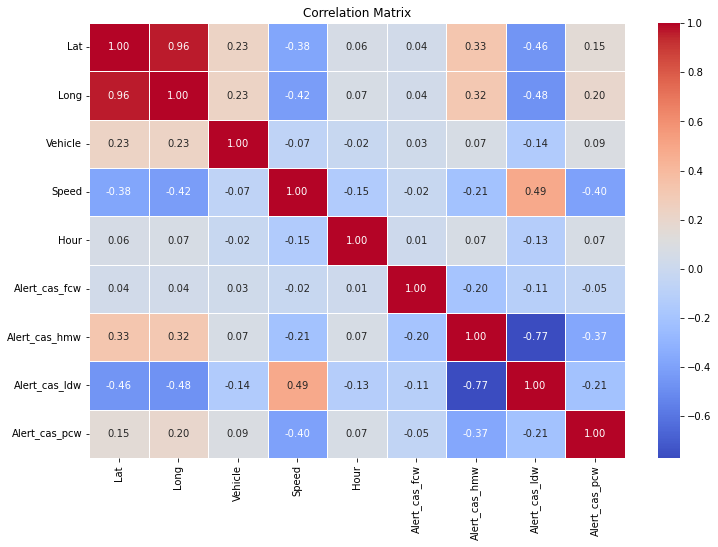

In [45]:
data_encoded = pd.get_dummies(data, columns=['Alert'], prefix='Alert')

# Step 2: Calculate correlation coefficients
correlation_matrix = data_encoded.corr()

# Print the correlation matrix to see the correlations
# print(correlation_matrix)

data_encoded = pd.get_dummies(data, columns=['Alert'], prefix='Alert')

# Step 2: Calculate correlation coefficients
correlation_matrix = data_encoded.corr()

# Step 3: Create a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()





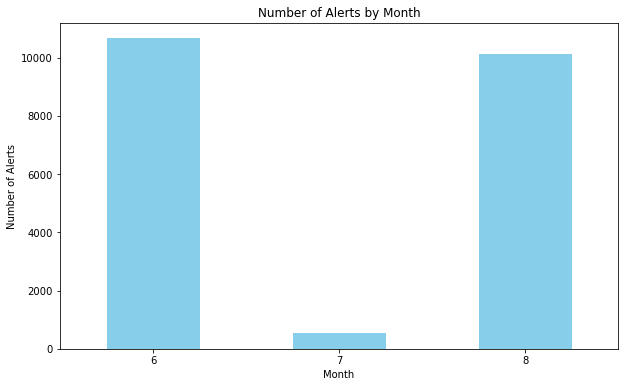

In [46]:
data['Month'] = data['Date'].dt.month

# Group the data by month and count the number of alerts
alerts_by_month = data.groupby('Month')['Alert'].count()

# Create a bar plot to visualize the number of alerts by month
plt.figure(figsize=(10, 6))
alerts_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Alerts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=0)  # Ensure month labels are not rotated
plt.show()